##Entendiendo el problema.

$$
a= \{a_{1},a_{2},a_{3}...a_{n} \} \in \mathbb{N}^{n}
$$
Este arreglo indica los tamaños de los objetos a que pueden meterse a la mochila, todos son enteros como se indica en la notación.

$$
b \in \mathbb{N}^{n}
$$

La capacidad de la maleta esta dada por b

$$
p \in [0,1]
$$

Indica la proporción en la que se obtienen soluciones validas en el problema

$$
x \in \{0,1\}^{n}
$$

x es un arreglo de n números donde se indica si hay un objeto con 1 o un objeto que no esta dentro de la maleta con un 0.

Este arreglo se va a modificar utilizando el método Monte Carlo más adelante.


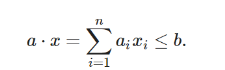


Esta expresión debe cumplirse para que una solución se considere verdadera, en caso de que alguna prueba resulte verdadera **k** se incrementará en 1 siendo **k** el numero de soluciones









##Primer Ejercicio sin Monte Carlo



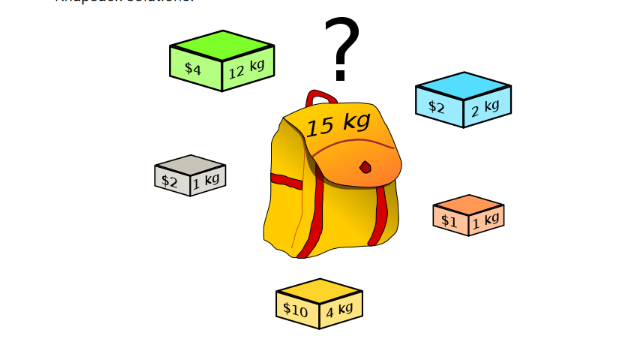

In [ ]:
# Inicializa el array base, los índices seleccionados y el conjunto de soluciones
base_array = [(12, 4), (2, 2), (1, 2), (1, 1), (4, 10)]
selected_indices = [0]
solutions = set([((tuple(), 0))])  # Agrega la solución de 0

# Bucle principal para generar todas las combinaciones posibles
while True:
    # Selecciona los elementos correspondientes a los índices seleccionados
    selected_elements = [base_array[i] for i in selected_indices]
    # Calcula la suma de los primeros elementos de las tuplas seleccionadas
    current_sum = sum(element[0] for element in selected_elements)

    # Si la suma es menor o igual a 15, calcula la suma de los segundos elementos de las tuplas seleccionadas
    # y agrega la combinación de elementos y su valor total al conjunto de soluciones
    if current_sum <= 15:
        value_sum = sum(element[1] for element in selected_elements)
        solutions.add((tuple(element[0] for element in selected_elements), value_sum))

    # Si la suma es menor que 15 y aún hay elementos en base_array que no se han considerado,
    # agrega el siguiente elemento en base_array a selected_indices
    if current_sum < 15 and selected_indices[-1] < len(base_array) - 1:
        selected_indices.append(selected_indices[-1] + 1)
    else:
        # Si la suma es 15 o más, o si ya se han considerado todos los elementos en base_array,
        # retrocede al eliminar el último índice de selected_indices
        while selected_indices and selected_indices[-1] == len(base_array) - 1:
            selected_indices.pop()
        # Si selected_indices está vacío, rompe el bucle principal
        if not selected_indices:
            break
        # Si selected_indices no está vacío, avanza al incrementar el último índice en selected_indices por 1
        selected_indices[-1] += 1

# Imprime todas las soluciones
for solution in solutions:
    print(f"Array: {list(solution[0])}, Valor: {solution[1]}")
print(f"El total de soluciones o k es {len(solutions)}")
print(f"El número total de alternativas posibles es  {2**(len(base_array))}" )
print(f"De manera que la proporción de soluciones es {len(solutions)}/{2**(len(base_array))} = {len(solutions)/2**(len(base_array))}")




Array: [2], Valor: 2
Array: [4], Valor: 10
Array: [12, 1], Valor: 6
Array: [2, 1, 1, 4], Valor: 15
Array: [], Valor: 0
Array: [2, 1, 1], Valor: 5
Array: [12], Valor: 4
Array: [1, 4], Valor: 11
Array: [2, 1], Valor: 4
Array: [12, 1], Valor: 5
Array: [2, 1, 4], Valor: 14
Array: [1], Valor: 2
Array: [12, 2], Valor: 6
Array: [12, 2, 1], Valor: 8
Array: [2, 1], Valor: 3
Array: [2, 1, 4], Valor: 13
Array: [1, 1], Valor: 3
Array: [12, 1, 1], Valor: 7
Array: [1], Valor: 1
Array: [12, 2, 1], Valor: 7
Array: [2, 4], Valor: 12
Array: [1, 4], Valor: 12
Array: [1, 1, 4], Valor: 13
El total de soluciones o k es 23
El número total de alternativas posibles es  32
De manera que la proporción de soluciones es 23/32 = 0.71875


De lo anterior es posible ver que la mejor solución es [2,1,1,4], cuyo valor es 15


##Montecarlo Ejercicios


Estimate the proportion and number of “Knapsack solutions.” if the sizes are (1,2,3,4,5,6,7,9,10) and the capacity of the knapsack is 10 using Mote Carlo with 1.000, 10.000 random binary vectors,

In [ ]:
import numpy as np

# Define los tamaños y capacidades
tamaños = np.arange(1,11)
capacidades = [10]
iteraciones = [10000, 100000]

# Para cada capacidad
for capacidad in capacidades:
    print(f"\nCapacidad: {capacidad}")
    # Para cada iteración de Monte Carlo
    for iteracion in iteraciones:
        k = 0
        # Genera vectores binarios aleatorios
        for _ in range(iteracion):
            vector_binario = np.random.randint(2, size=len(tamaños))
            suma = np.sum(vector_binario * tamaños)
            # Si el tamaño total es menor o igual a la capacidad, incrementa el contador
            if suma <= capacidad:
                k += 1
        # Calcula la proporción de soluciones exitosas
        p = k / iteracion
        print(f"Iteraciones: {iteracion}, Número de soluciones: {k}, Proporción: {p}")


Capacidad: 10
Iteraciones: 10000, Número de soluciones: 414, Proporción: 0.0414
Iteraciones: 100000, Número de soluciones: 4093, Proporción: 0.04093


Estimate the proportion and number of “Knapsack solutions.” if the sizes are (1,2,3,4,…, 49,50) and the capacity of the knapsack are 10, 50, 100, 1275 using Mote Carlo with 10.000, 100.000 and 1.000.000 random binary vectors.

In [ ]:
import numpy as np

# Define los tamaños y capacidades
tamaños = np.arange(1,51)
capacidades = [10,50,100,1275]
iteraciones = [10000, 100000,1000000]

# Para cada capacidad
for capacidad in capacidades:
    print(f"\nCapacidad: {capacidad}")
    # Para cada iteración de Monte Carlo
    for iteracion in iteraciones:
        k = 0
        # Genera vectores binarios aleatorios
        for _ in range(iteracion):
            vector_binario = np.random.randint(2, size=len(tamaños))
            suma = np.sum(vector_binario * tamaños)
            # Si el tamaño total es menor o igual a la capacidad, incrementa el contador
            if suma <= capacidad:
                k += 1
        # Calcula la proporción de soluciones exitosas
        p = k / iteracion
        print(f"Iteraciones: {iteracion}, Número de soluciones: {k}, Proporción: {p}")


Capacidad: 10
Iteraciones: 10000, Número de soluciones: 0, Proporción: 0.0
Iteraciones: 100000, Número de soluciones: 0, Proporción: 0.0
Iteraciones: 1000000, Número de soluciones: 0, Proporción: 0.0

Capacidad: 50
Iteraciones: 10000, Número de soluciones: 0, Proporción: 0.0
Iteraciones: 100000, Número de soluciones: 0, Proporción: 0.0
Iteraciones: 1000000, Número de soluciones: 0, Proporción: 0.0

Capacidad: 100
Iteraciones: 10000, Número de soluciones: 0, Proporción: 0.0
Iteraciones: 100000, Número de soluciones: 0, Proporción: 0.0
Iteraciones: 1000000, Número de soluciones: 0, Proporción: 0.0

Capacidad: 1275
Iteraciones: 10000, Número de soluciones: 10000, Proporción: 1.0
Iteraciones: 100000, Número de soluciones: 100000, Proporción: 1.0
Iteraciones: 1000000, Número de soluciones: 1000000, Proporción: 1.0


Dada la cantidad de elementos (50) de tamaño progresivo hasta 50 las soluciones para las cantidades 10 a 100 son muy difíciles de conseguir ya que con pocos elementos que esten asociados a un 1 en el vector binario la mayoria de las capacidades se exceden, esto no ocurre con la capacidad de 1275 ya que la suma de 1 hasta 50 no rebasa esta capacidad lo que significa que para cualquier vector binario siempre habrán soluciones